# Comarison Implementation of LSTM, XGBoost, ARIMA, SARIMA and GARCH models on Bitcoin price prediction

##Important Libraries

In [71]:
pip install --upgrade tensorflow

In [72]:
!pip install mplfinance

In [73]:
pip install pmdarima

In [74]:
pip install --upgrade statsmodels

In [75]:
!pip install mplfinance

In [76]:
!pip install arch

In [77]:
# Silence warnings
import os
import re
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Data Manipulation
import pandas as pd
from pandas import read_csv
from pandas import Series
from pandas import DataFrame
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import matplotlib as m
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import plotly.express as px
from itertools import cycle
from itertools import product
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
%matplotlib inline

# Data Source
import yfinance as yf

# Stats models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import  q_stat, adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pmdarima as pm
# Date tools
from datetime import datetime, timedelta, date

# Prophet model
import prophet
from prophet import Prophet

# xgboost model
from xgboost import XGBRegressor
# Imports for model metrics and performance
import math
from math import sqrt
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Intialize a sequential model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from mplfinance.original_flavor import candlestick_ohlc
import pylab as p
from collections import Counter

# GARCH modeling
from arch import arch_model
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from scipy.stats import probplot, moment


In [78]:
np.random.seed(0)

In [79]:
# read data and display first 10 rows
data = yf.download(tickers='BTC-USD', start = '2015-01-01', end = date.today(), interval = '1D')
# df = pd.read_csv('/content/BTC-USD.csv')

[*********************100%%**********************]  1 of 1 completed


##Data Preprocessing

In [10]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600


In [11]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-05,68515.757812,68725.757812,66011.476562,67837.640625,67837.640625,33748230056
2024-04-06,67840.570312,69629.601562,67491.718750,68896.109375,68896.109375,19967785809
2024-04-07,68897.109375,70284.429688,68851.632812,69362.554688,69362.554688,21204930369
2024-04-08,69362.554688,72715.359375,69064.242188,71631.359375,71631.359375,37261432669
2024-04-09,71632.500000,71742.507812,68212.921875,69139.015625,69139.015625,36426900409
2024-04-10,69140.242188,71093.429688,67503.562500,70587.882812,70587.882812,38318601774
2024-04-11,70575.734375,71256.234375,69571.812500,70060.609375,70060.609375,30153382941
2024-04-12,70061.382812,71222.742188,65254.835938,67195.867188,67195.867188,44129299406
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,63821.472656,52869738185


In [12]:
# Checking for Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
# Check for Duplicates
data = data.drop_duplicates()

In [14]:
data.shape

(3392, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2015-01-01 to 2024-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3.392000e+03
mean,16276.637992,16658.050544,15870.328569,16294.633575,16294.633575,1.762055e+10
std,17559.898541,17983.840909,17094.295739,17575.768042,17575.768042,1.933930e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1308.774994,1325.324951,1289.602509,1317.417480,1317.417480,5.277642e+08
50%,8930.775879,9182.774902,8775.562012,8929.159180,8929.159180,1.365846e+10
75%,27119.595215,27462.020996,26701.888672,27130.191406,27130.191406,2.816265e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


# EDA(Exploratory Data Analysis)

## Analysis of Year 2015

In [96]:
#Analysis of Year 2015
y_2015 = data.loc[(data.index >= '2015-01-01')
                     & (data.index < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2015-01-07,286.076996,298.753998,283.079010,294.337006,286.188995,274.473999,264.195007
2015-01-08,294.135010,294.135010,282.174988,283.348999,294.337006,286.188995,274.473999
2015-01-09,282.382996,291.114014,280.532990,290.407990,283.348999,294.337006,286.188995
2015-01-10,287.303009,288.127014,273.966003,274.795990,290.407990,283.348999,294.337006
2015-01-11,274.608002,279.638000,265.039001,265.660004,274.795990,290.407990,283.348999
...,...,...,...,...,...,...,...
2015-12-27,416.514008,424.006989,408.882996,422.822998,417.273987,455.653015,454.984985
2015-12-28,423.342987,429.769012,418.480988,422.278992,422.822998,417.273987,455.653015
2015-12-29,422.097992,432.983002,420.627014,432.983002,422.278992,422.822998,417.273987


In [97]:
monthvise= y_2015.groupby(y_2015.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,241.423842,239.081519
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708668,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


In [98]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2015, x=y_2015.index, y=[y_2015['Open'], y_2015['Close'],
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2016

In [99]:
#Analysis of Year 2016
y_2016 = data.loc[(data.index >= '2016-01-01')
                     & (data.index < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,430.566986,426.619995,432.983002
2016-01-02,434.622009,436.062012,431.869995,433.437988,434.334015,430.566986,426.619995
2016-01-03,433.578003,433.743011,424.705994,430.010986,433.437988,434.334015,430.566986
2016-01-04,430.061005,434.516998,429.084015,433.091003,430.010986,433.437988,434.334015
2016-01-05,433.069000,434.182007,429.675995,431.959991,433.091003,430.010986,433.437988
...,...,...,...,...,...,...,...
2016-12-27,908.354004,940.047974,904.255005,933.197998,907.609985,896.182983,898.822021
2016-12-28,934.830994,975.921021,934.830994,975.921021,933.197998,907.609985,896.182983
2016-12-29,975.125000,979.396973,954.502991,973.497009,975.921021,933.197998,907.609985


In [100]:
monthvise= y_2016.groupby(y_2016.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


In [101]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2016, x=y_2016.index, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2017

In [102]:
# Analysis of Year 2017
y_2017 = data.loc[(data.index >= '2017-01-01')
                     & (data.index < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,963.742981,961.237976,973.497009
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,998.325012,963.742981,961.237976
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1021.750000,998.325012,963.742981
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1043.839966,1021.750000,998.325012
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1154.729980,1043.839966,1021.750000
...,...,...,...,...,...,...,...
2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,16099.799805,14026.599609,13925.799805
2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,15838.500000,16099.799805,14026.599609
2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14606.500000,15838.500000,16099.799805


In [103]:
monthvise= y_2017.groupby(y_2017.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


In [104]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2017, x=y_2017.index, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2018

In [105]:
# Analysis of Year 2018
y_2018 = data.loc[(data.index >= '2018-01-01')
                     & (data.index < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,14156.400391,12952.200195,14656.200195
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,13657.200195,14156.400391,12952.200195
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,14982.099609,13657.200195,14156.400391
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15201.000000,14982.099609,13657.200195
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,15599.200195,15201.000000,14982.099609
...,...,...,...,...,...,...,...
2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496,3857.297607,3815.490723,4078.599121
2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701,3654.833496,3857.297607,3815.490723
2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691,3923.918701,3654.833496,3857.297607


In [106]:
monthvise= y_2018.groupby(y_2018.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


In [107]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2018, x=y_2018.index, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2019

In [108]:
# Analysis of Year 2019
y_2019 = data.loc[(data.index >= '2019-01-01')
                     & (data.index < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3742.700439,3865.952637,3820.408691
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3843.520020,3742.700439,3865.952637
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3943.409424,3843.520020,3742.700439
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3836.741211,3943.409424,3843.520020
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3857.717529,3836.741211,3943.409424
...,...,...,...,...,...,...,...
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7238.966797,7275.155762,7322.532227
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7290.088379,7238.966797,7275.155762
2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7317.990234,7290.088379,7238.966797


In [109]:
monthvise= y_2019.groupby(y_2019.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [110]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2019, x=y_2019.index, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2020

In [111]:
# Analysis of Year 2020
y_2020 = data.loc[(data.index >= '2020-01-01')
                     & (data.index < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7193.599121,7292.995117,7422.652832
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,7200.174316,7193.599121,7292.995117
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,6985.470215,7200.174316,7193.599121
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7344.884277,6985.470215,7200.174316
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7410.656738,7344.884277,6985.470215
...,...,...,...,...,...,...,...
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26437.037109,24664.791016,23735.949219
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,26272.294922,26437.037109,24664.791016
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27084.808594,26272.294922,26437.037109


In [112]:
monthvise= y_2020.groupby(y_2020.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477327
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276855


In [113]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.index, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2021

In [114]:
# Analysis of Year 2021
y_2021 = data.loc[(data.index >= '2021-01-01')
                     & (data.index < '2022-1-1')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29001.720703,28840.953125,27362.437500
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,29374.152344,29001.720703,28840.953125
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32127.267578,29374.152344,29001.720703
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,32782.023438,32127.267578,29374.152344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,31971.914062,32782.023438,32127.267578
...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50809.515625,50429.859375,50822.195312
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,50640.417969,50809.515625,50429.859375
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,47588.855469,50640.417969,50809.515625


In [115]:
monthvise= y_2021.groupby(y_2021.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967215,46306.798968
March,54544.678175,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154687
July,34234.212450,34444.973790
August,45516.119834,45709.022681
September,46041.859375,45939.771484


In [116]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2021, x=y_2021.index, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2022

In [117]:
# Analysis of Year 2022
y_2022 = data.loc[(data.index >= '2022-01-01')
                     & (data.index < '2023-1-1')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,46306.445312,47178.125000,46444.710938
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47686.812500,46306.445312,47178.125000
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,47345.218750,47686.812500,46306.445312
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,46458.117188,47345.218750,47686.812500
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,45897.574219,46458.117188,47345.218750
...,...,...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16919.804688,16841.986328,16847.755859
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16717.173828,16919.804688,16841.986328
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16552.572266,16717.173828,16919.804688


In [118]:
monthvise= y_2022.groupby(y_2022.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319661
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [119]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.index, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2023

In [120]:
# Analysis of Year 2023
y_2023 = data.loc[(data.index >= '2023-01-01')
                     & (data.index < '2024-01-9')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Open,High,Low,Close,lag_1,lag_2,lag_3
Date,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16547.496094,16602.585938,16642.341797
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16625.080078,16547.496094,16602.585938
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16688.470703,16625.080078,16547.496094
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16679.857422,16688.470703,16625.080078
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16863.238281,16679.857422,16688.470703
...,...,...,...,...,...,...,...
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,42848.175781,44957.968750,44167.332031
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44179.921875,42848.175781,44957.968750
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,44162.691406,44179.921875,42848.175781


In [121]:
monthvise= y_2023.groupby(y_2023.index.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,24922.142628,25204.900741
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198437
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [122]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2023, x=y_2023.index, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

##**A candlestick chart** is a graphical representation of the price movement of an asset over a specified period of time. It's used in financial analysis to display the price movement of a stock, currency, or commodity.
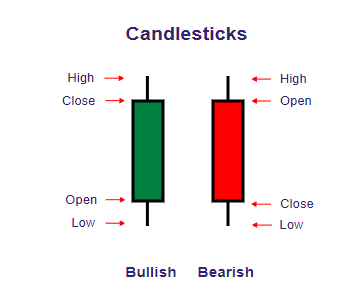

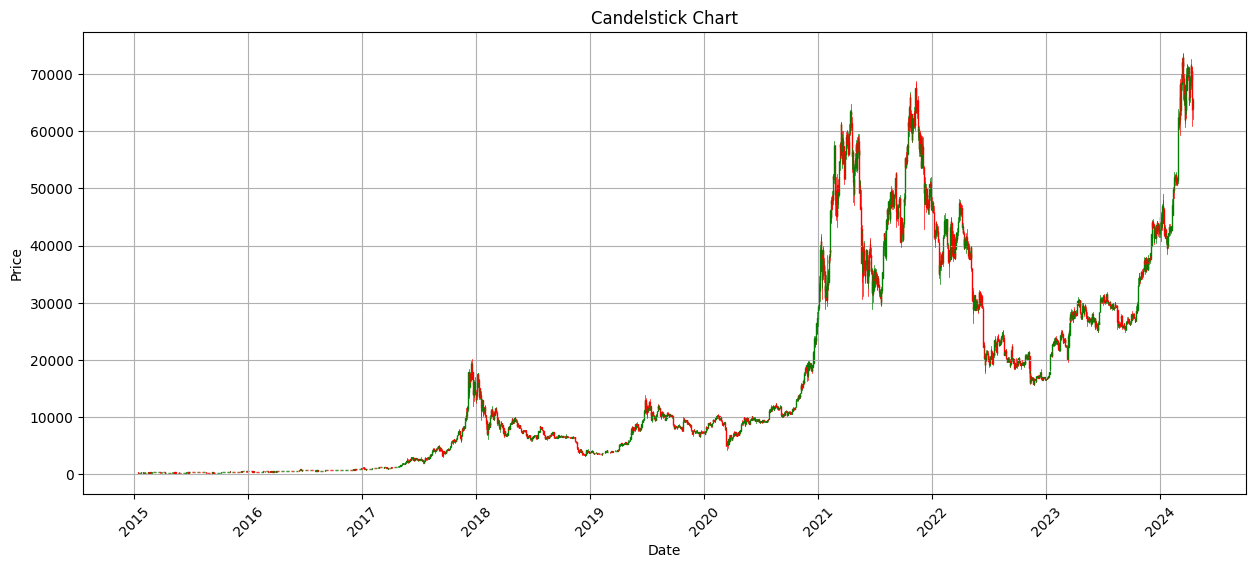

In [123]:
matplotlib_date = mdates.date2num(data.index)

# create a array of tuples in the required format
ohlc = np.vstack((matplotlib_date, data['Open'], data['High'], data['Low'], data['Close'])).T
plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

ax.xaxis_date()
plt.title('Candelstick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Closing prices and Moving Average plot

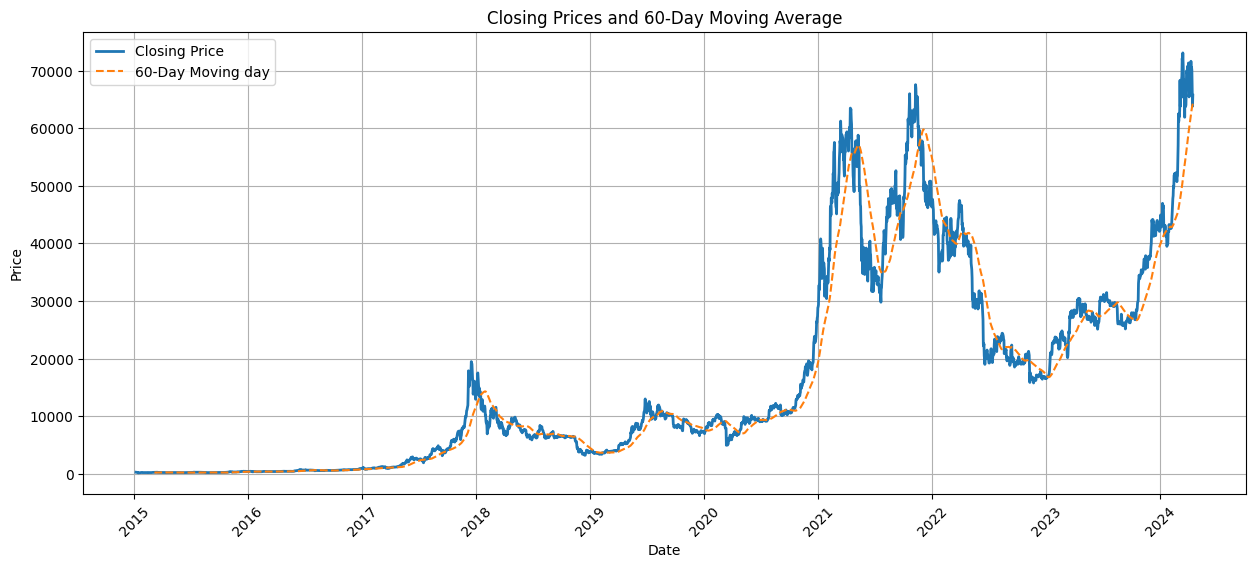

In [124]:
# closing prices and 60 days moving average plot
window = 60
plt.figure(figsize=(15,6))
plt.plot(data.index, data['Close'], label='Closing Price', linewidth=2)
plt.plot(data.index,data['Close'].rolling(window=window).mean(),label=f'{window}-Day Moving day', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

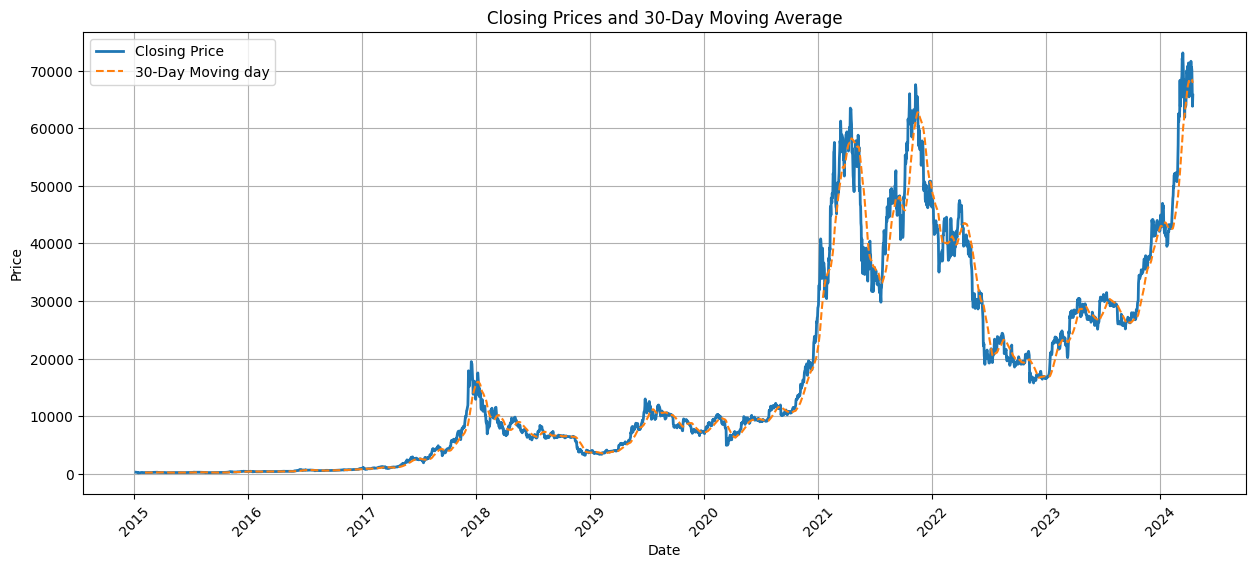

In [125]:
# closing prices and 30 days moving average plot
window = 30
plt.figure(figsize=(15,6))
plt.plot(data.index, data['Close'], label='Closing Price', linewidth=2)
plt.plot(data.index,data['Close'].rolling(window=window).mean(),label=f'{window}-Day Moving day', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

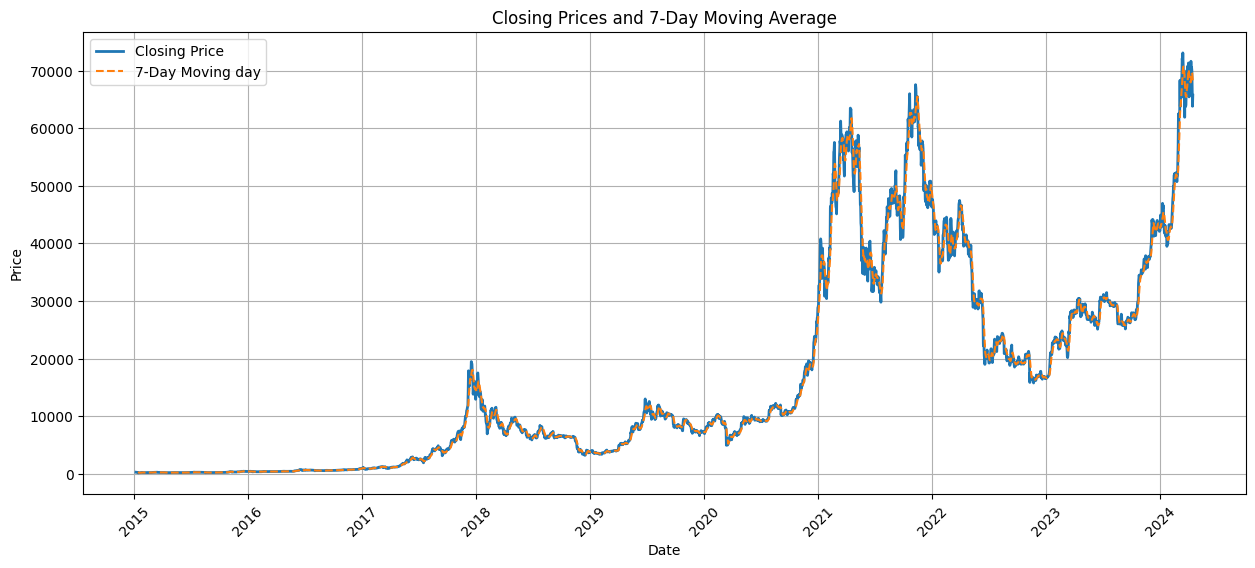

In [126]:
# closing prices and 7 days moving average plot
window = 7
plt.figure(figsize=(15,6))
plt.plot(data.index, data['Close'], label='Closing Price', linewidth=2)
plt.plot(data.index,data['Close'].rolling(window=window).mean(),label=f'{window}-Day Moving day', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

##Check Stationarity

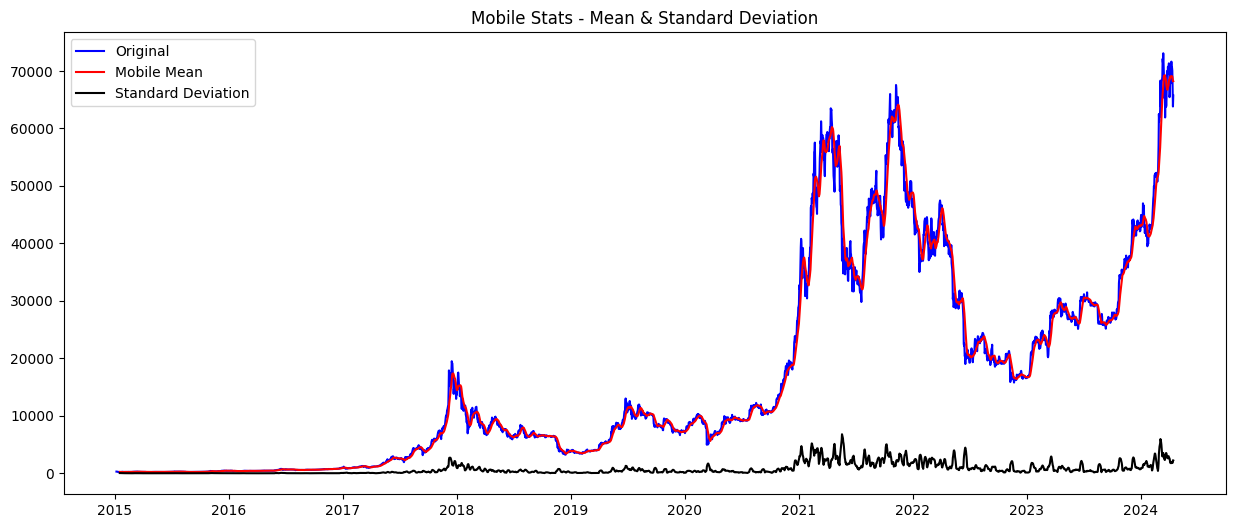


Dickey-Fuller Test Result:

Test Stats                       -0.752222
p-value                           0.832755
Number of Lags                   29.000000
Number of Used Observations    3356.000000
Critic Value (1%)                -3.432300
Critic Value (5%)                -2.862402
Critic Value (10%)               -2.567229
dtype: float64

Conclusion:

O p-valuer > 0.05 and, therefore, we have no evidences to reject H0.
This serie probably is not stationary.


In [127]:
# Defining a function to test serie stationarity.
def stationarity_test(serie):

    # Calculate mobile stats
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot mobile stats
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Mobile Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Mobile Stats - Mean & Standard Deviation')
    plt.show()

    # Dickey-Fuller Test:
    # Print
    print('\nDickey-Fuller Test Result:\n')

    # Test
    dftest = adfuller(serie, autolag = 'AIC')

    # Output
    dfout= pd.Series(dftest[0:4], index = ['Test Stats',
                                               'p-value',
                                               'Number of Lags',
                                               'Number of Used Observations'])

    # Loop for each test output
    for key, value in dftest[4].items():
        dfout['Critic Value (%s)'%key] = value

    # Print
    print (dfout)

    # Test p-value
    print ('\nConclusion:')
    if dfout[1] > 0.05:
        print('\nO p-valuer > 0.05 and, therefore, we have no evidences to reject H0.')
        print('This serie probably is not stationary.')
    else:
        print('\nO p-value < 0.05 and, therefore, we have evidences to reject H0.')
        print('This serie probably is stationary')


# Apply function
stationarity_test(data['Close'])

The serie must be stationary to be passed to the model. A serie is stationary when its properties like mean and variance remain constant over time. This series will be differentiated in order to get stationary.

## Check Decomposition

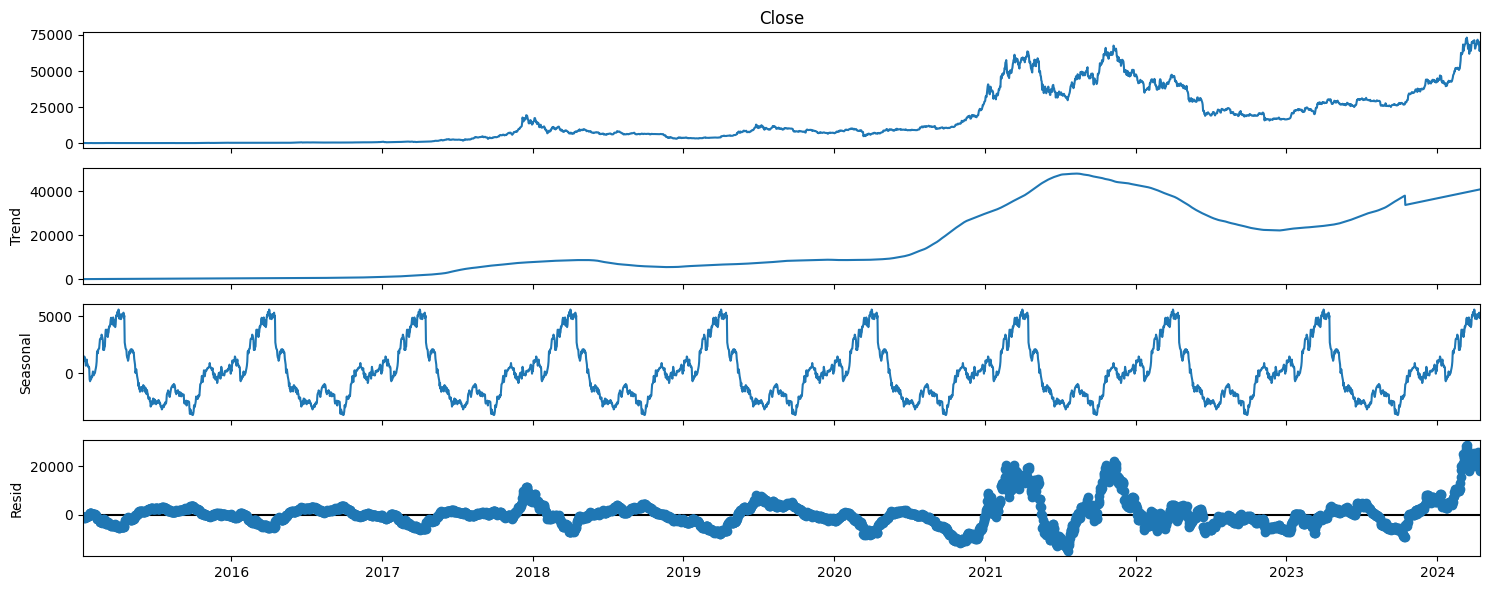

In [128]:
# Decompose - Addictive
result_add = seasonal_decompose(data['Close'], model = 'additive', period=365, extrapolate_trend = 'freq')

# Plot
result_add.plot()
plt.show()

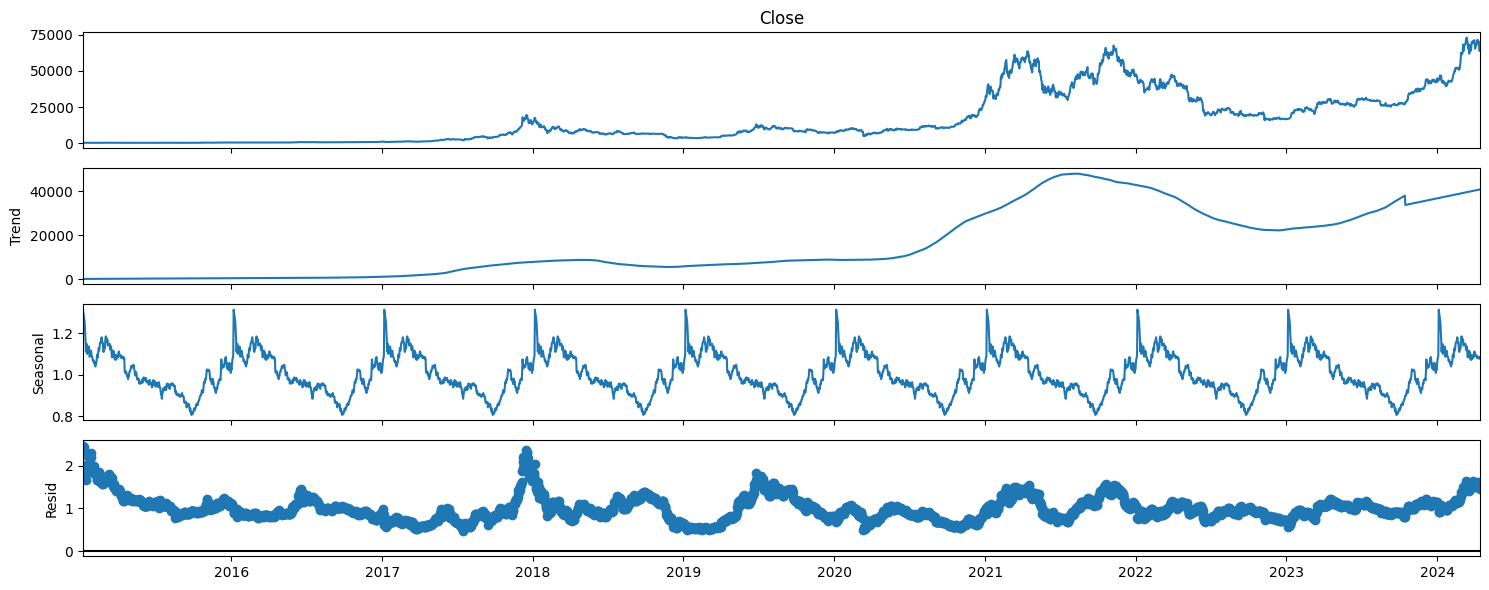

In [129]:
# Decompose - Multuplicative
result_mul = seasonal_decompose(data['Close'], model = 'multiplicative', period = 365, extrapolate_trend = 'freq')

# Plot
result_mul.plot()
plt.show()

In [130]:
# Extracting Components
# Observations = (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Resid', 'Observed_Values']
df_reconstructed.head()

,Seasonal,Trend,Resid,Observed_Values
Date,,,,
2015-01-07,1.313026,90.992172,2.463585,294.337006
2015-01-08,1.294695,91.838704,2.383025,283.348999
2015-01-09,1.283992,92.685235,2.440257,290.407990
2015-01-10,1.266810,93.531767,2.319208,274.795990
2015-01-11,1.252513,94.378299,2.247356,265.660004


This serie presents a trend of increasing since 2020. It also have a annual seasonal component and random residuals.

## Check Autocorrelation and Partial Autocorrelation

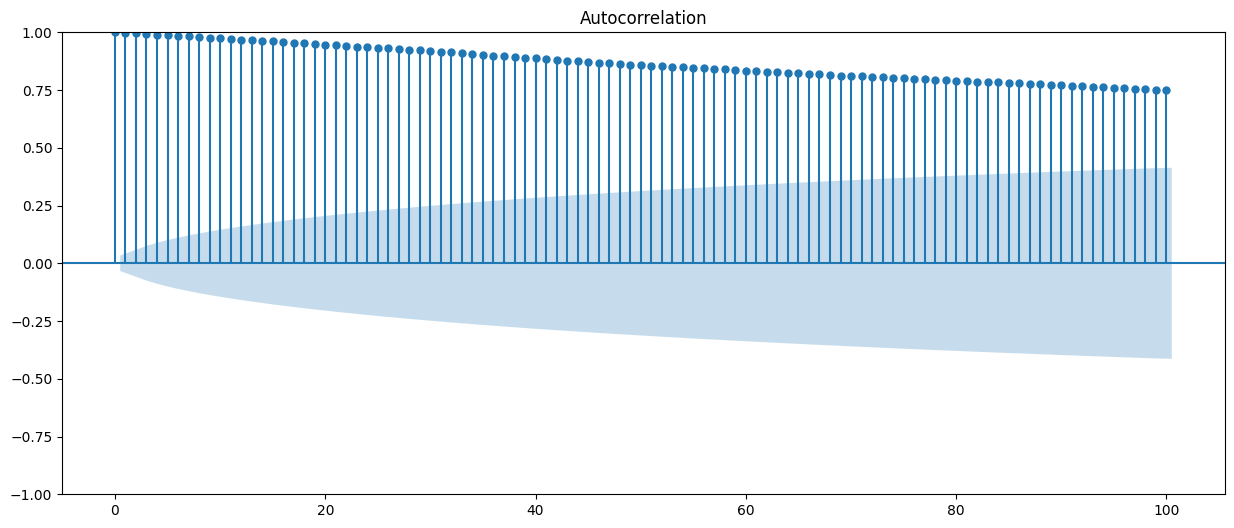

In [131]:
# Plot ACF (Auto Correlation)
acf_plot = plot_acf(data.Close, lags = 100)

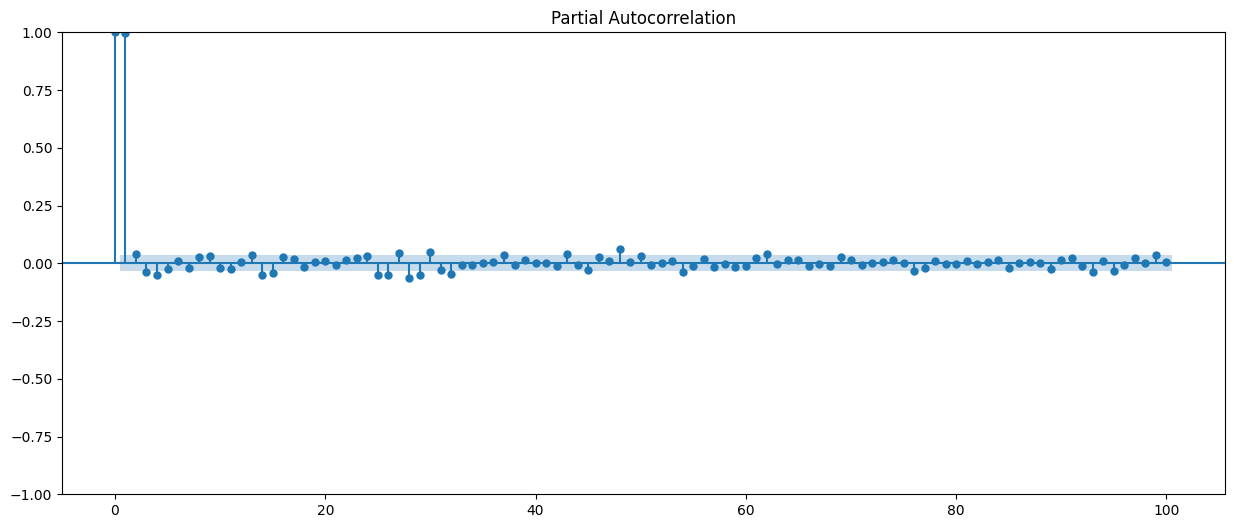

In [132]:
# Plot PACF (Auto Correlation)
pacf_plot = plot_pacf(data.Close, lags = 100)

This serie is strongly autocorrelated.

##Box Cox Transformation

Using Box Transformation in the serie because the series does not have constant variance.

In [133]:
data['Close_Box'], lmbda = stats.boxcox(data.Close)

## Differentiation

In [134]:
# Differentiation function
def diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff


# invert differenced value
def inverse_difference(history, yhat):
    desdiff = list()
    for i in range(1, len(yhat)):
        valued = yhat[i] + history[i-1]
        desdiff.append(valued)
    return desdiff

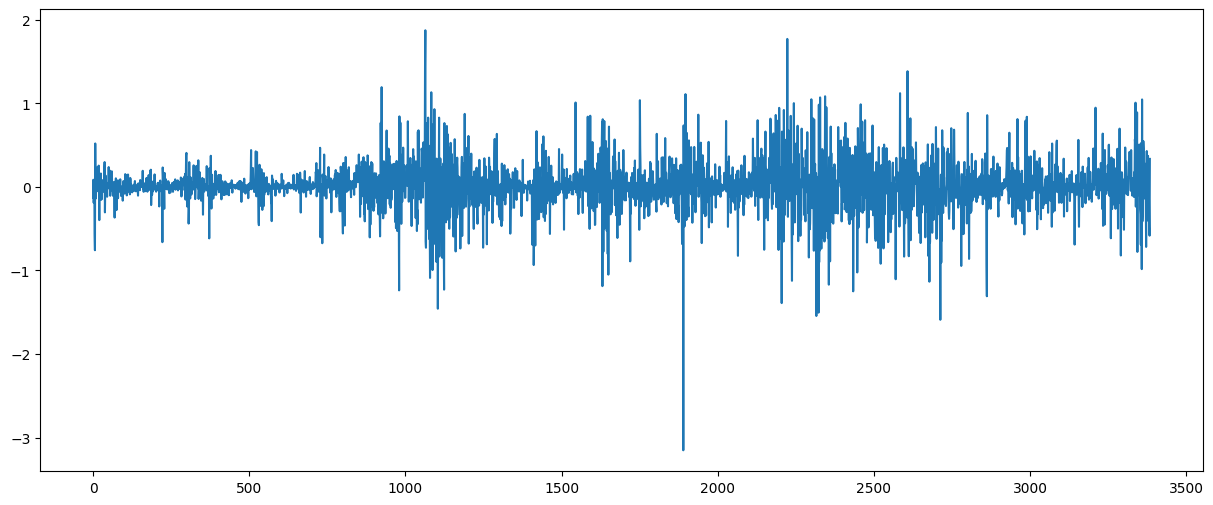

In [135]:
# Differentiation of 1st order
cox_diff = diffFunc(data.Close_Box)
plt.plot(cox_diff);

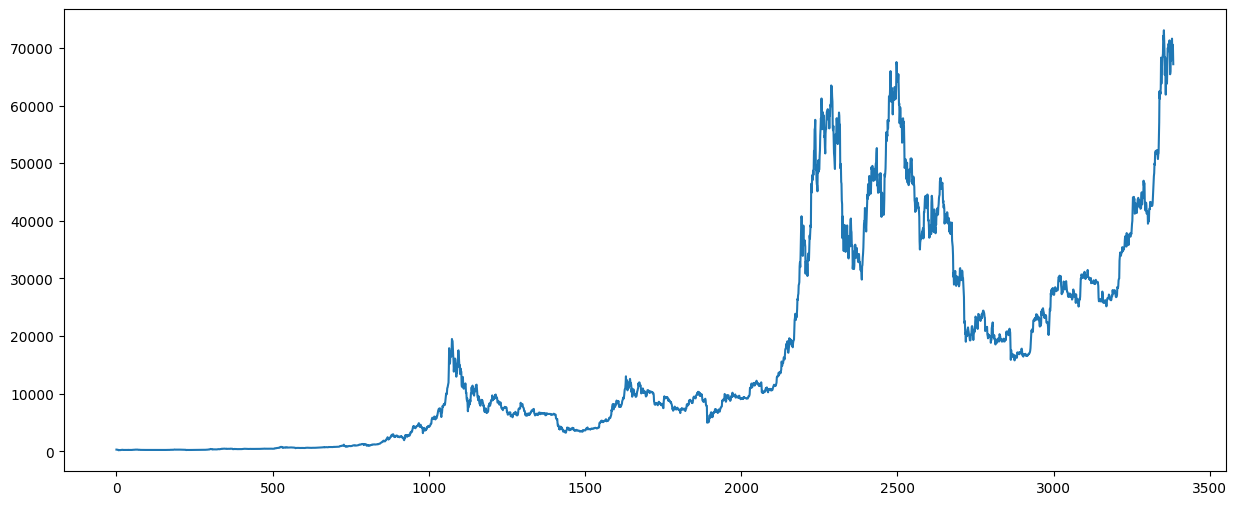

In [136]:
## testing undiff function
undif = inverse_difference(data['Close'], cox_diff)
undif
plt.plot(undif);

In [137]:
len(cox_diff)

3385

In [138]:
# Convert in df
cox_diff = pd.DataFrame(cox_diff)

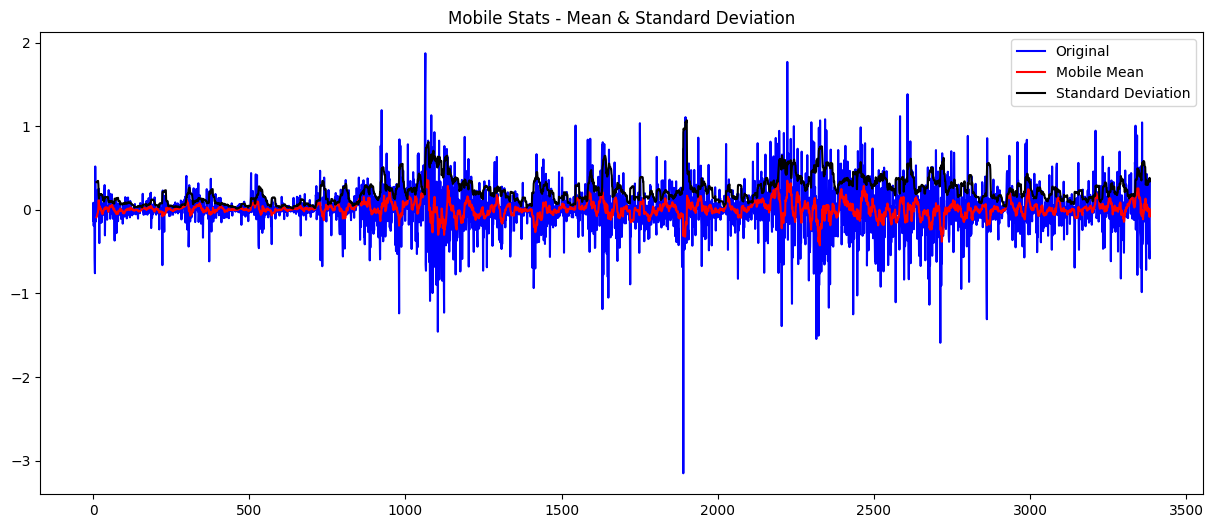


Dickey-Fuller Test Result:

Test Stats                    -1.731014e+01
p-value                        5.560851e-30
Number of Lags                 9.000000e+00
Number of Used Observations    3.375000e+03
Critic Value (1%)             -3.432289e+00
Critic Value (5%)             -2.862397e+00
Critic Value (10%)            -2.567226e+00
dtype: float64

Conclusion:

O p-value < 0.05 and, therefore, we have evidences to reject H0.
This serie probably is stationary


In [139]:
# Testing if the differentiation was enough
stationarity_test(cox_diff)

In [140]:
# Remove NA values generated
cox_diff.dropna(inplace=True)

In [141]:
x = pd.Series([0])
cox_diff = pd.concat([x, cox_diff])
data.reset_index()

data = data.reset_index()
cox_diff = cox_diff.set_index(data['Date'])
data = data.set_index('Date')

In [142]:
data['cox_diff'] = cox_diff

# Models Implementations

## LSTM Implementation

In [80]:

# Use the closing price for forecasting
df = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Function to create sequences and labels for the LSTM model
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Set the sequence length and create sequences and labels
sequence_length = 10
X, y = create_sequences(df_scaled, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0715 - val_loss: 6.7811e-04
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.1522e-04 - val_loss: 3.9078e-04
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.0331e-04 - val_loss: 3.7668e-04
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.3456e-04 - val_loss: 3.2071e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6145e-04 - val_loss: 3.0201e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3725e-04 - val_loss: 2.8751e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9121e-04 - val_loss: 2.5596e-04
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.6031e-04 - val_loss: 2.4478e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.6927e-04 - val_loss: 3.7948e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.6473e-04 - val_loss: 2.2777e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3923e-04 - v

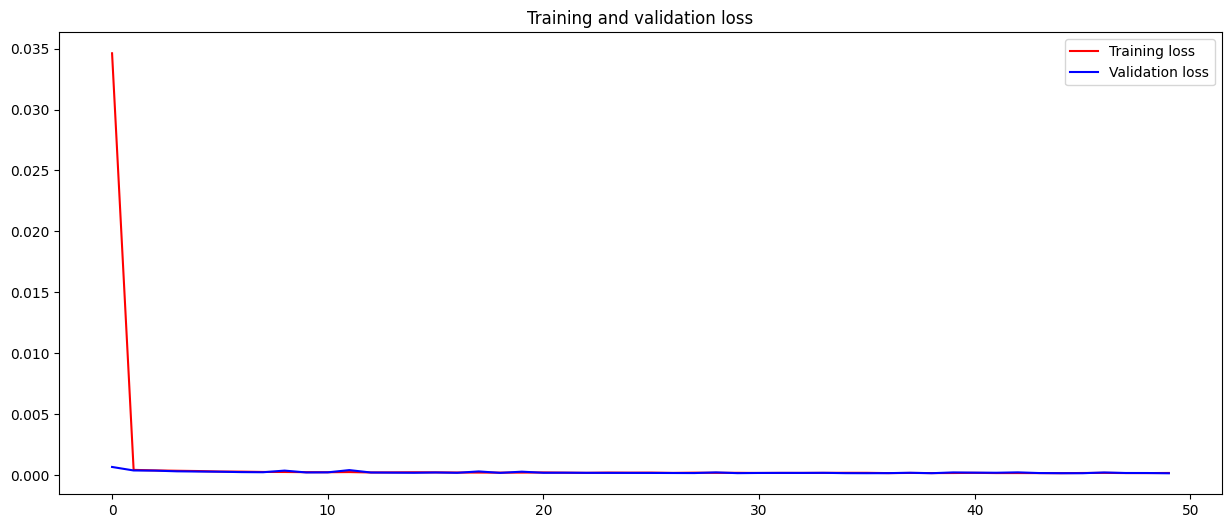

<Figure size 1500x600 with 0 Axes>

In [83]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model

history = model.fit(X_train, y_train,validation_data=(X_train, y_train), epochs=50, batch_size=32, verbose=1,
          callbacks= [checkpoints, early_stopping])

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [84]:
# Evaluate the model on the test set
test_predictions = model.predict(X_test)

# Invert the scaling to get actual prices
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_actual, test_predictions)
print(f'MSE: {mse:.3f}')
mae = mean_absolute_error(y_test_actual, test_predictions)
print(f'MAE: {mae:.3f}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')
mape = np.mean(np.abs((y_test_actual - test_predictions) / y_test_actual)) * 100
print(f'MAPE: {mape:.3f}')

# Calculate accuracy (you might want to use a different metric based on your specific requirements)
accuracy = 1 - (mean_absolute_error(y_test_actual, test_predictions) / y_test_actual.mean())
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate the MSE percentage
mse_percentage = mse / np.mean(np.square(y_test_actual)) * 100
print(f'Mean Squared Error (MSE) Percentage: {mse_percentage:.2f}%')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MSE: 1369092.938
MAE: 804.454
RMSE: 1170.082
MAPE: 2.720
Accuracy: 97.34%
Mean Squared Error (MSE) Percentage: 0.13%


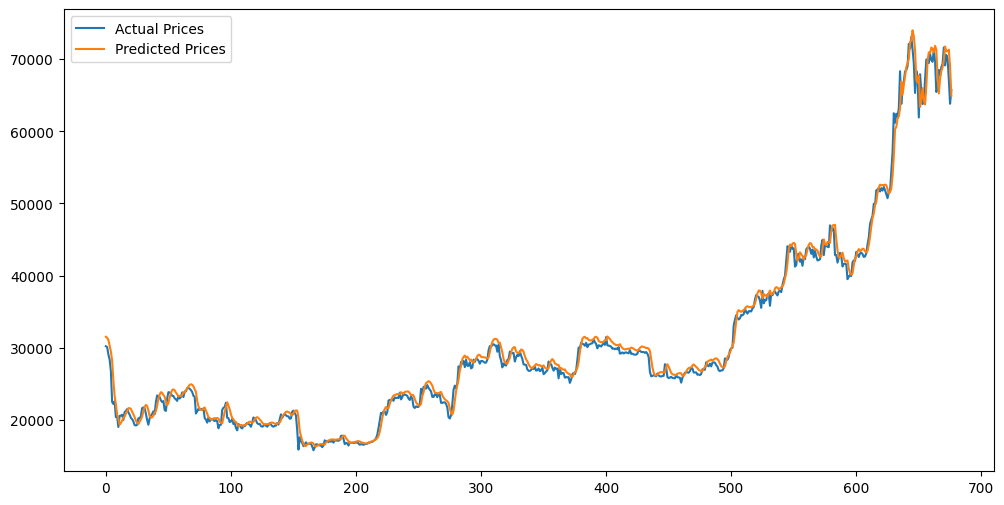

In [85]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [86]:
#Creat a new dataframe with only Close Price
new_y = data['Close'][-10:].values

#Get the last 60 day closing price values and convert the datadrame to an arrays
last_60_days_dates = data.index[-10:]

# Combine dates and predicted prices
result_df = pd.DataFrame({'Date': last_60_days_dates, 'Predicted Price': test_predictions[-10:].flatten(),'Real Price': new_y})

# Print the result
print(result_df)


        Date  Predicted Price    Real Price
0 2024-04-05     67276.625000  67837.640625
1 2024-04-06     68361.218750  68896.109375
2 2024-04-07     68884.312500  69362.554688
3 2024-04-08     69830.265625  71631.359375
4 2024-04-09     71767.242188  69139.015625
5 2024-04-10     71104.453125  70587.882812
6 2024-04-11     71129.953125  70060.609375
7 2024-04-12     71319.718750  67195.867188
8 2024-04-13     69008.078125  63821.472656
9 2024-04-14     64938.667969  65738.726562


## XGBoost Implementation

[0]	validation_0-rmse:15139.93950	validation_0-mae:11481.58003	validation_1-rmse:19833.52725	validation_1-mae:15767.10572
[1]	validation_0-rmse:13655.00665	validation_0-mae:10355.40908	validation_1-rmse:18049.83792	validation_1-mae:14329.85031
[2]	validation_0-rmse:12317.96814	validation_0-mae:9327.13683	validation_1-rmse:16401.72210	validation_1-mae:12940.68659
[3]	validation_0-rmse:11114.13954	validation_0-mae:8408.16451	validation_1-rmse:14893.83706	validation_1-mae:11623.92404
[4]	validation_0-rmse:10030.19662	validation_0-mae:7582.39672	validation_1-rmse:13570.07036	validation_1-mae:10479.30837
[5]	validation_0-rmse:9048.41286	validation_0-mae:6842.91625	validation_1-rmse:12351.11853	validation_1-mae:9469.70612
[6]	validation_0-rmse:8161.59358	validation_0-mae:6164.28865	validation_1-rmse:11245.16656	validation_1-mae:8482.99256
[7]	validation_0-rmse:7364.13526	validation_0-mae:5562.70335	validation_1-rmse:10254.81865	validation_1-mae:7681.76138
[8]	validation_0-rmse:6644.18047	val

<ipython-input-88-d931f78660d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-d931f78660d3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-d931f78660d3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10

[30]	validation_0-rmse:737.72174	validation_0-mae:532.22161	validation_1-rmse:2194.91164	validation_1-mae:1322.82368
[31]	validation_0-rmse:673.74634	validation_0-mae:482.65907	validation_1-rmse:2119.88096	validation_1-mae:1277.94786
[32]	validation_0-rmse:616.49794	validation_0-mae:438.79911	validation_1-rmse:2047.34067	validation_1-mae:1236.07605
[33]	validation_0-rmse:565.48283	validation_0-mae:398.83191	validation_1-rmse:1985.14284	validation_1-mae:1198.74783
[34]	validation_0-rmse:520.09506	validation_0-mae:363.20918	validation_1-rmse:1934.44968	validation_1-mae:1169.31730
[35]	validation_0-rmse:480.24503	validation_0-mae:331.66345	validation_1-rmse:1898.25982	validation_1-mae:1146.85012
[36]	validation_0-rmse:444.31198	validation_0-mae:303.57382	validation_1-rmse:1857.74082	validation_1-mae:1123.52019
[37]	validation_0-rmse:412.81459	validation_0-mae:278.54896	validation_1-rmse:1818.95328	validation_1-mae:1101.71065
[38]	validation_0-rmse:384.81818	validation_0-mae:256.28742	vali

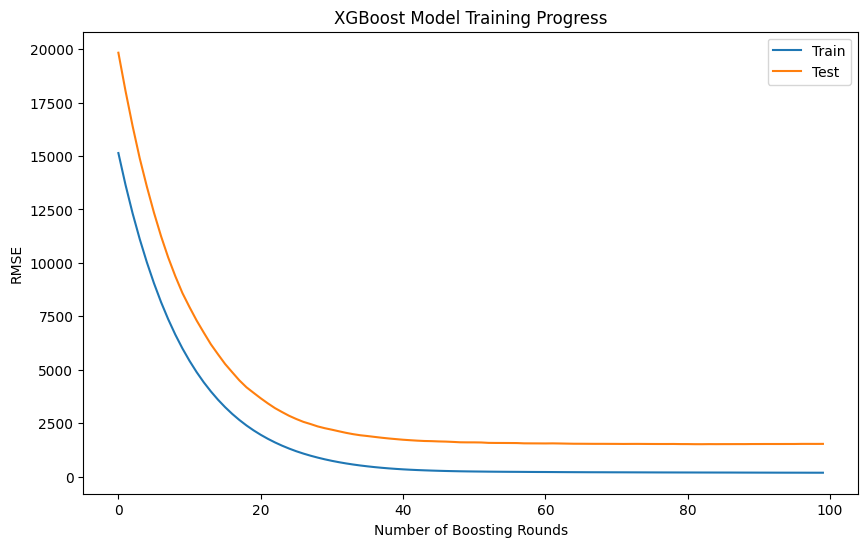

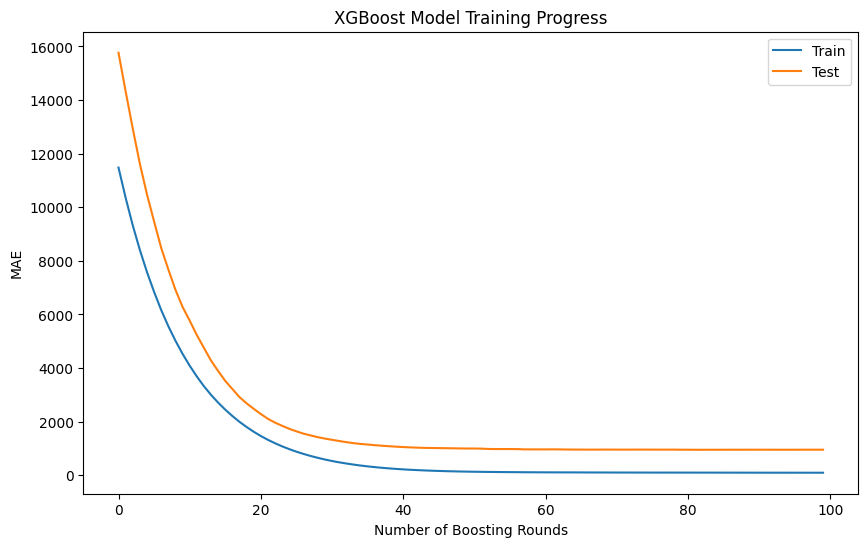

In [88]:
# Feature engineering: Creating lag features
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)

# Drop rows with NaN values created due to lag features
data = data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define X and y
X_train, y_train = train.drop('Close', axis=1), train['Close']
X_test, y_test = test.drop('Close', axis=1), test['Close']

# Initialize and train the XGBoost model with evaluation set
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8
)

eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train, y_train,
    eval_metric=["rmse", "mae"],
    eval_set=eval_set,
    verbose=True
)

# Plotting training progress
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Model Training Progress')
plt.legend()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['mae'], label='Train')
plt.plot(x_axis, results['validation_1']['mae'], label='Test')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('MAE')
plt.title('XGBoost Model Training Progress')
plt.legend()
plt.show()


In [89]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.3f}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'MAPE: {mape:.3f}')

# Calculate accuracy (you might want to use a different metric based on your specific requirements)
accuracy = 1 - (mean_absolute_error(y_test, predictions) / y_test.mean())
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate the MSE percentage
mse_percentage = mse / np.mean(np.square(y_test)) * 100
print(f'Mean Squared Error (MSE) Percentage: {mse_percentage:.2f}%')


Mean Squared Error: 2345123.636704352
MAE: 953.810
RMSE: 1531.380
MAPE: 3.248
Accuracy: 96.85%
Mean Squared Error (MSE) Percentage: 0.22%


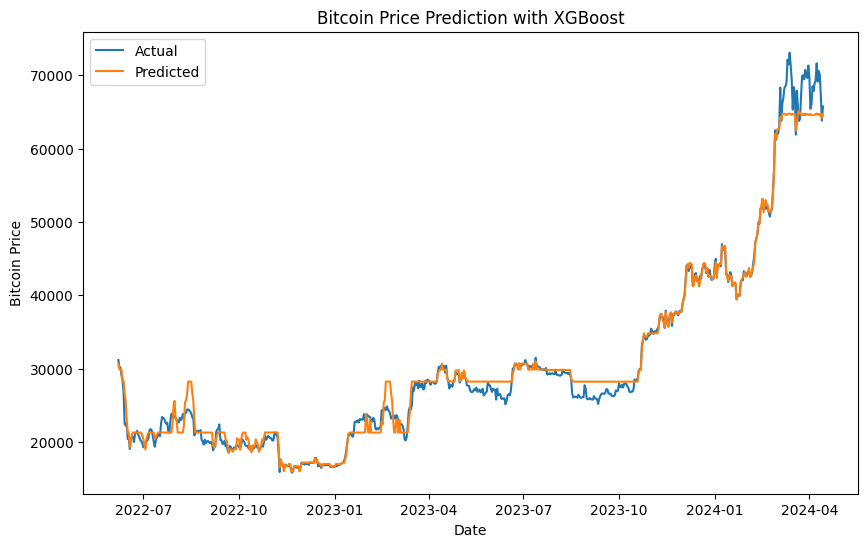

In [90]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction with XGBoost')
plt.legend()
plt.show()

In [91]:
#Creat a new dataframe with only Close Price
new_y = data['Close'][-10:].values

#Get the last 60 day closing price values and convert the datadrame to an arrays
last_60_days_dates = data.index[-10:]

# Combine dates and predicted prices
result_df = pd.DataFrame({'Date': last_60_days_dates, 'Predicted Price': predictions[-10:].flatten(),'Real Price': new_y})

# Print the result
print(result_df)

        Date  Predicted Price    Real Price
0 2024-04-05     64553.722656  67837.640625
1 2024-04-06     64663.593750  68896.109375
2 2024-04-07     64663.593750  69362.554688
3 2024-04-08     64790.230469  71631.359375
4 2024-04-09     64659.023438  69139.015625
5 2024-04-10     64741.148438  70587.882812
6 2024-04-11     64520.695312  70060.609375
7 2024-04-12     64709.968750  67195.867188
8 2024-04-13     64175.757812  63821.472656
9 2024-04-14     64745.925781  65738.726562


## Prophet Implementation

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr65a_35j/8i6sx6tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr65a_35j/or7rymtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95795', 'data', 'file=/tmp/tmpr65a_35j/8i6sx6tr.json', 'init=/tmp/tmpr65a_35j/or7rymtj.json', 'output', 'file=/tmp/tmpr65a_35j/prophet_modelggsnrw9x/prophet_model-20240415104703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE: 838975361.967
MAE: 27666.366
RMSE: 28965.071
MAPE: 1.134


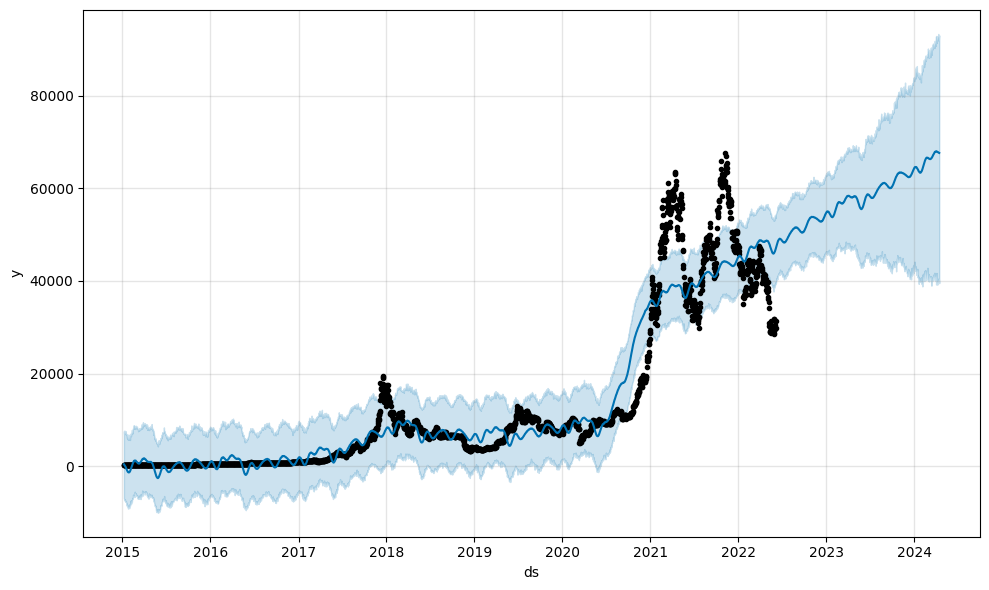

In [92]:
# Prepare the data for Prophet
df = pd.DataFrame({'ds': data.index, 'y': data['Close']}).reset_index(drop=True)

# Feature engineering: Add trading volume as an additional feature
df['volume'] = data['Volume']

# Handle missing values by filling NaN with the mean of the column
df['volume'].fillna(df['volume'].mean(), inplace=True)

# Train-test split
train_size = int(len(df) * 0.80)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Initialize and fit the model without the 'volume' regressor
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(train_df.drop('volume', axis=1))

# Make predictions
future = model.make_future_dataframe(periods=len(test_df))
future['volume'] = df['volume']  # Include volume in the future dataframe

# Predict with the updated future dataframe
forecast = model.predict(future)

# Extract predicted values
predictions = forecast[-len(test_df):]['yhat'].values

mse = mean_squared_error(test_df['y'], predictions)
print(f'MSE: {mse:.3f}')
mae = mean_absolute_error(test_df['y'], predictions)
print(f'MAE: {mae:.3f}')
rmse = math.sqrt(mean_squared_error(test_df['y'], predictions))
print(f'RMSE: {rmse:.3f}')
mape = np.mean(np.abs(predictions - test_df['y'])/np.abs(test_df['y']))
print(f'MAPE: {mape:.3f}')

# Plot the results
fig = model.plot(forecast)



## ARIMA Implementation

(2708, 11)
(678, 11)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



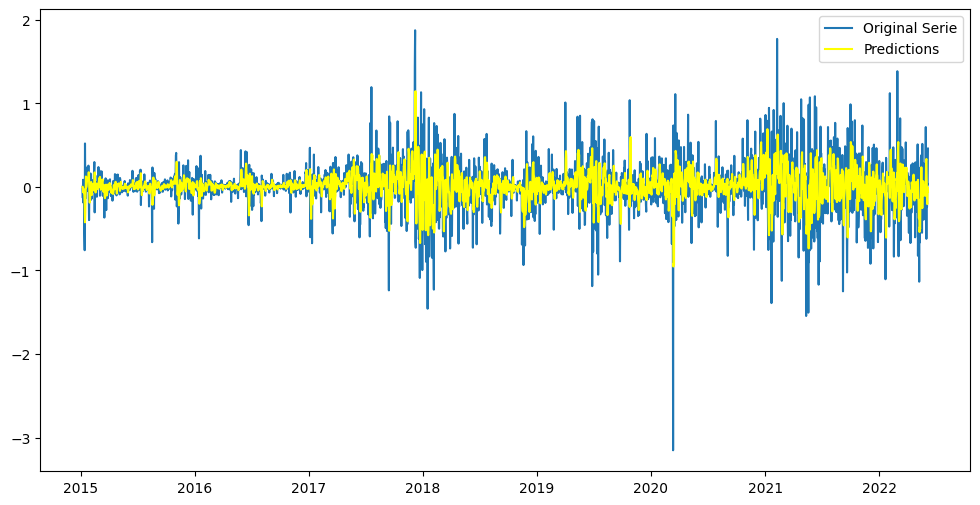

In [143]:
# Split test and train
X = data
train_size = int(len(X) * 0.80)
trainset, testset = X[0:train_size], X[train_size:]

print(trainset.shape)
print(testset.shape)

target = trainset['cox_diff']
# Model
model_AR = sm.tsa.ARIMA(target, order = (2, 1, 0))
# Fitting
model_arima_fit = model_AR.fit()
# Real Data and Predictions
real_data = target
pred = model_arima_fit.fittedvalues
# Plot
plt.figure(figsize=(12, 6))
plt.plot(real_data, label = 'Original Serie')
plt.plot(pred, color = 'yellow', label = 'Predictions')
plt.legend(loc = 'best')
plt.show()

In [144]:
# Summary
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               cox_diff   No. Observations:                 2708
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -845.879
Date:                Mon, 15 Apr 2024   AIC                           1697.757
Time:                        10:49:05   BIC                           1715.468
Sample:                    01-07-2015   HQIC                          1704.161
                         - 06-06-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6988      0.010    -67.826      0.000      -0.719      -0.679
ar.L2         -0.3379      0.012    -29.242      0.000      -0.361      -0.315
sigma2         0.1094      0.001     75.912      0.0

In [145]:
# Forecast - alpha is the interval of confidence - 95%
fc= model_arima_fit.forecast(steps=len(testset))

# Calculate confidence intervals separately
conf_int = model_arima_fit.get_forecast(steps=len(testset)).conf_int(alpha=0.05)

# Dataframe to plot
fc_series = pd.Series(fc, index=testset.index)
lower_limit = pd.Series(conf_int.iloc[:, 0], index=testset.index)
upper_limit = pd.Series(conf_int.iloc[:, 1], index=testset.index)

# Getting real values to forecast
forecast = inverse_difference(testset['Close_Box'], fc_series)
forecast = inv_boxcox(forecast, lmbda)
forecast = pd.DataFrame(forecast)
forecast = pd.concat([x, forecast])
forecast.reset_index()
forecast = forecast.set_index(testset.index)

# Getting real values to lower limit
lower = inverse_difference(testset['Close_Box'], lower_limit)
lower = inv_boxcox(lower, lmbda)

# Getting real values to upper limit
upper = inverse_difference(testset['Close_Box'], upper_limit)
upper = inv_boxcox(upper, lmbda)

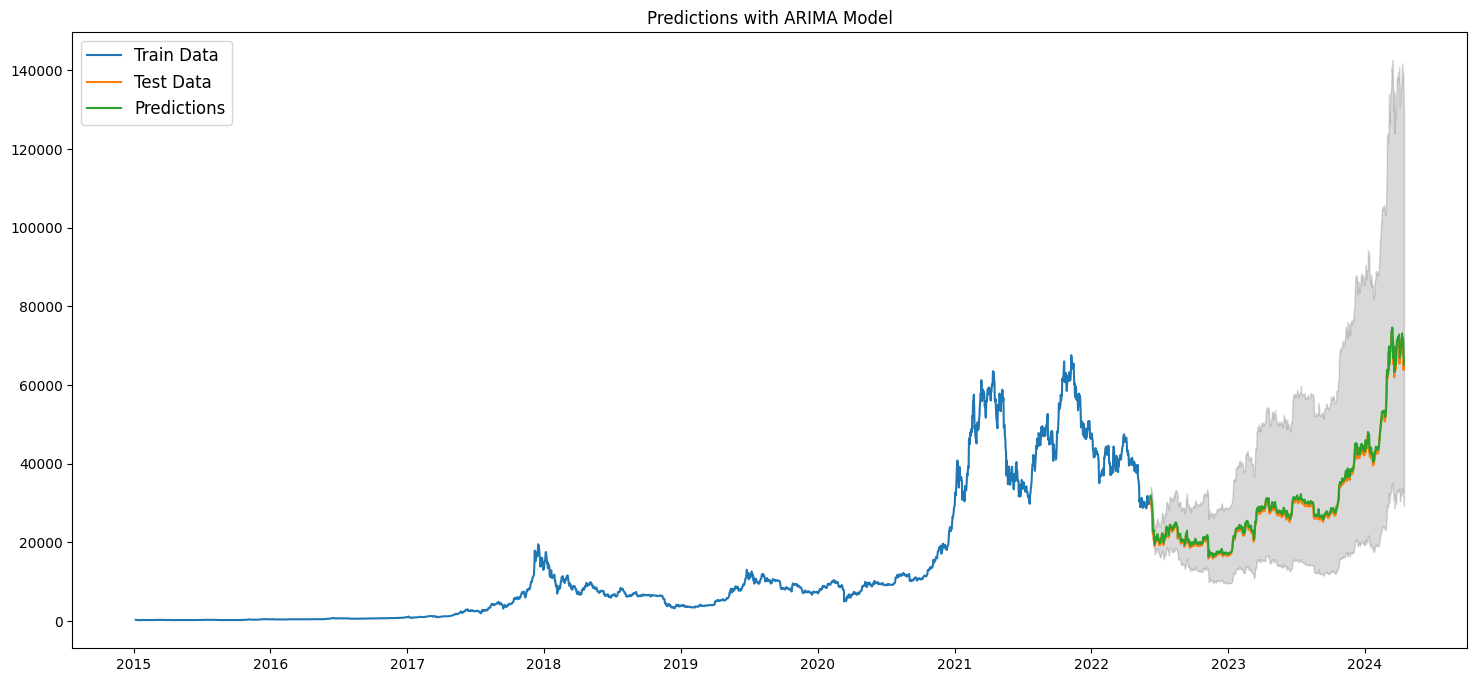

In [146]:
# Plot
plt.figure(figsize=(18, 8))
plt.plot(trainset['Close'], label = 'Train Data')
plt.plot(testset['Close'], label = 'Test Data')
plt.plot(forecast[1:], label = 'Predictions')
plt.fill_between(lower_limit.index[1:], lower, upper, color = 'k', alpha = .15)
plt.title('Predictions with ARIMA Model')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [147]:

# Calculate metrics
mse = mean_squared_error(testset['Close'].values, forecast.values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testset['Close'].values, forecast.values)
mape = np.mean(np.abs((testset['Close'].values - forecast.values) / testset['Close'].values)) * 100

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')


MSE: 2902468.410
MAE: 948.582
RMSE: 1703.663
MAPE: 45.941


## SARIMA - Seasonal Arima Implementation

In [148]:
import pmdarima as pm
# Grid Search to find the best model
model_sarima = pm.auto_arima(trainset['cox_diff'],
                          seasonal = True,
                          m = 12,
                          d = 0,
                          D = 1,
                          max_p = 2,
                          max_q = 2,
                          trace = True,
                          error_action = 'ignore',
                          suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=36.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2850.317, Time=0.78 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2003.039, Time=4.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=17.68 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2848.323, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2848.995, Time=0.48 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1752.568, Time=13.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=51.55 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=23.32 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1752.544, Time=11.17 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2001.543, Time=3.69 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=38.49 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=15.51 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1752.636, Time=10.95 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : A

In [149]:
# Summary
print(model_sarima.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                 2708
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -872.273
Date:                  Mon, 15 Apr 2024   AIC                           1750.546
Time:                          10:57:55   BIC                           1768.245
Sample:                      01-07-2015   HQIC                          1756.947
                           - 06-06-2022                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6791      0.011    -60.013      0.000      -0.701      -0.657
ar.S.L24      -0.3006      0.013    -23.399      0.000      -0.326      -0.275
sigma2         0.1116      0.001    

In [150]:
# Create the model
model_sarima_v1 = sm.tsa.statespace.SARIMAX(data['cox_diff'],
                                             order = (0, 0, 0),
                                             seasonal_order = (2, 1, 0, 12),
                                             enforce_stationarity = False,
                                             enforce_invertibility = False)
# Train the Model
model_sarima_v1_fit = model_sarima_v1.fit()
# Summary
print(model_sarima_v1_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                SARIMAX Results                                 
Dep. Variable:                 cox_diff   No. Observations:                 3386
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood               -1028.854
Date:                  Mon, 15 Apr 2024   AIC                           2063.708
Time:                          10:58:17   BIC                           2082.058
Sample:                      01-07-2015   HQIC                          2070.271
                           - 04-14-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6713      0.010    -64.692      0.000      -0.692      -0.651
ar.S.L24      -0.2918      0.012    -24.620      0.000      -0.315      -0.269
sigma2         0.1082      0.001    

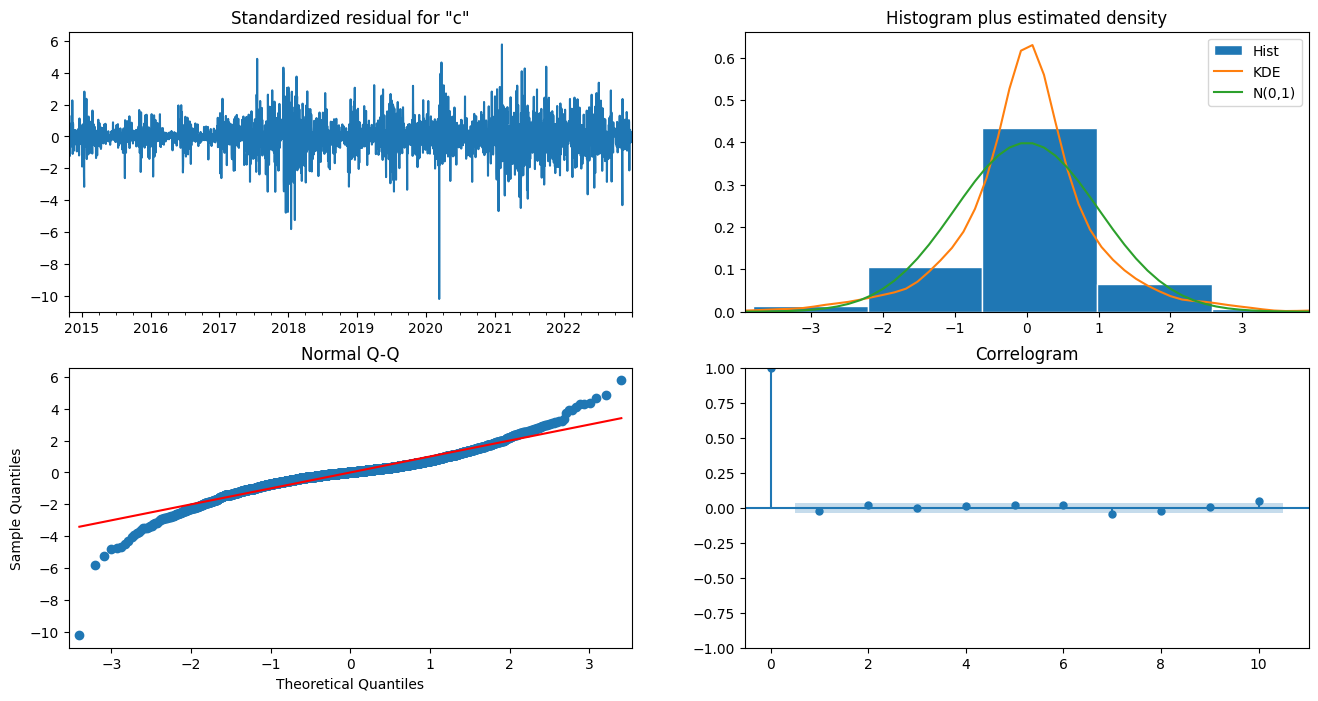

In [ ]:
# Model stats
model_sarima_v1_fit.plot_diagnostics(figsize = (16, 8))
plt.show()

In [187]:
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Make sure it's in the desired format
current_date = pd.to_datetime(current_date)

# Now you can use current_date as the end date for your prediction
sarima_predict_1 = model_sarima_v1_fit.get_prediction(start=pd.to_datetime('2022-06-9'),
                                                       end=current_date,
                                                       dynamic=False)

In [188]:
# Confidence Interval
sarima_predict_conf_1 = sarima_predict_1.conf_int()
sarima_predict_conf_1

,lower cox_diff,upper cox_diff
2022-06-09,-0.647885,0.641616
2022-06-10,-0.750043,0.539458
2022-06-11,-0.660812,0.628689
2022-06-12,-0.486688,0.802813
2022-06-13,-1.104011,0.185490
...,...,...
2024-04-11,-0.594704,0.694797
2024-04-12,-0.886897,0.402604
2024-04-13,-0.267647,1.021854
2024-04-14,-1.028074,0.261427


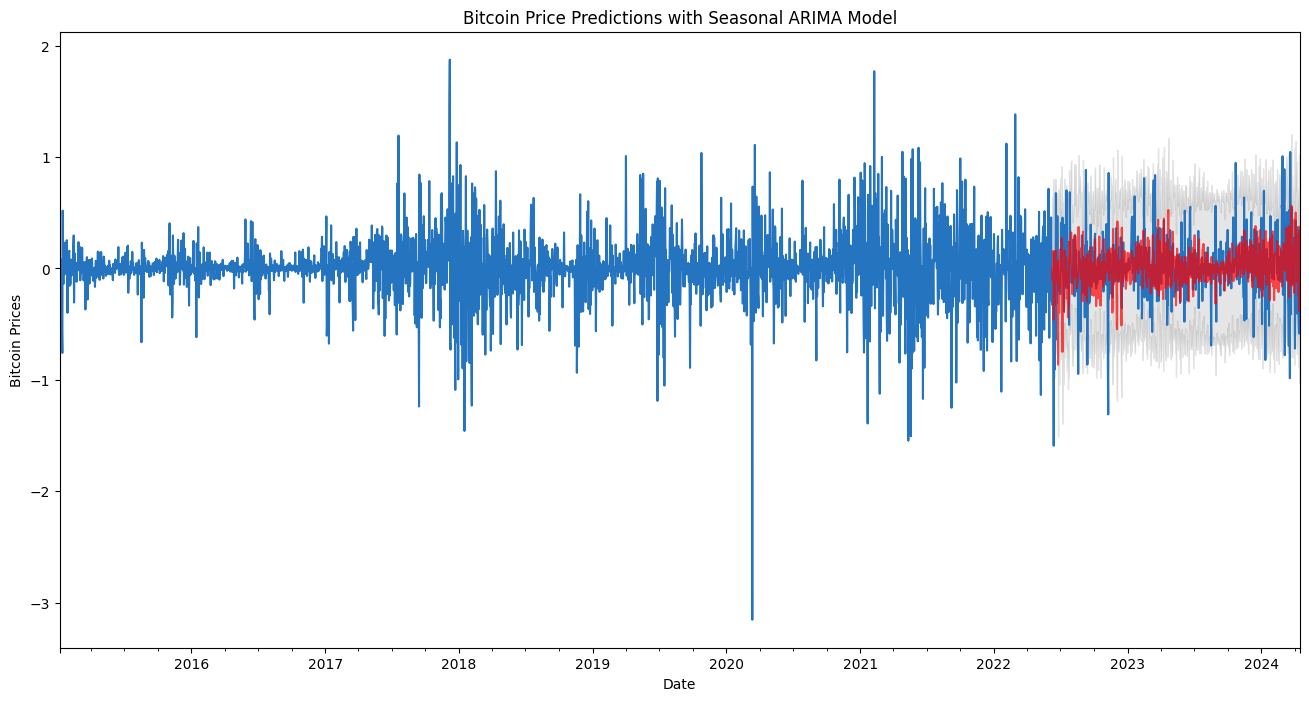

In [189]:
# Plot of observed values
ax = data.cox_diff.plot(label = 'Observed Values', color = '#2574BF', figsize = (16, 8))

# Plot of predicted values
sarima_predict_1.predicted_mean.plot(ax = ax,
                                     label = 'SARIMA (0, 0, 0)x(0, 1, 1, 12)',
                                     alpha = 0.7,
                                     color = 'red', figsize = (16, 8))

# Confidence Interval
ax.fill_between(sarima_predict_conf_1.index,
                # lower limit
                sarima_predict_conf_1.iloc[:, 0],
                # upper limit
                sarima_predict_conf_1.iloc[:, 1], color = 'k', alpha = 0.1)

plt.title('Bitcoin Price Predictions with Seasonal ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Prices')
plt.show()

In [190]:
# getting real values
sarima_pred = inverse_difference(testset['Close_Box'], sarima_predict_1.predicted_mean)
sarima_pred = inv_boxcox(sarima_pred, lmbda)
sarima_pred = pd.DataFrame(sarima_pred)
sarima_pred = pd.concat([x, sarima_pred])
sarima_pred.reset_index()
sarima_pred = sarima_pred.set_index(testset[:-1].index)

# Getting real values to lower limit
lower = inverse_difference(testset['Close_Box'], sarima_predict_conf_1.iloc[:, 0])
lower = inv_boxcox(lower, lmbda)

# Getting real values to upper limit
upper = inverse_difference(testset['Close_Box'], sarima_predict_conf_1.iloc[:, 1])
upper = inv_boxcox(upper, lmbda)

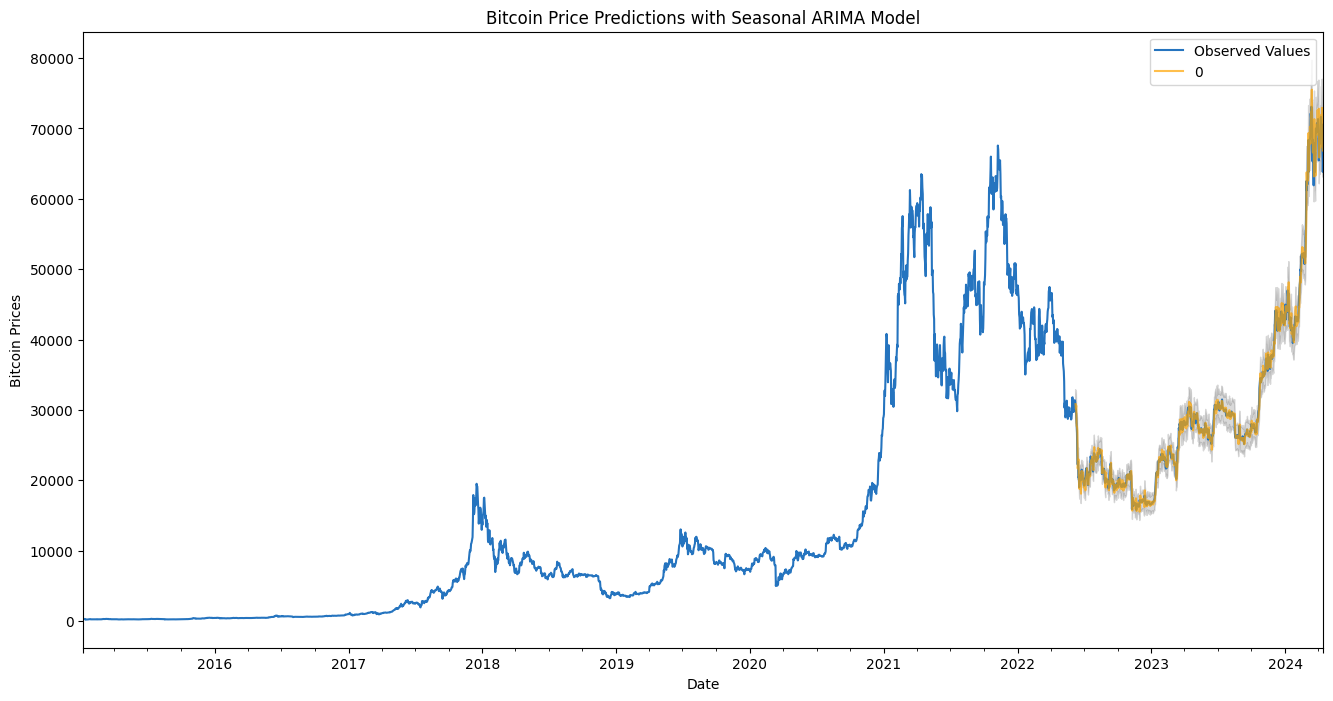

In [191]:
# Plot real values
# Plot of observed values
ax = data.Close.plot(label = 'Observed Values', color = '#2574BF', figsize = (16, 8))

# Plot of predicted values
sarima_pred[1:].plot(ax = ax, label = 'SARIMA', alpha = 0.7,
                 color = 'orange', figsize = (16, 8))

# Confidence Interval
ax.fill_between(testset.index[:-2],
                # lower limit
                lower,
                # upper limit
                upper, color = 'k', alpha = 0.15)

# Title and legend
plt.title('Bitcoin Price Predictions with Seasonal ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Prices')
plt.legend()
plt.show()

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate metrics
mse = mean_squared_error(testset['Close'][:-1].values, sarima_pred.values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testset['Close'][:-1].values, sarima_pred.values)
mape = np.mean(np.abs((testset['Close'][:-1].values - sarima_pred.values) / testset['Close'][:-1].values)) * 100

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')

MSE: 2732931.440
MAE: 761.103
RMSE: 1653.158
MAPE: 45.032


## GARCH Implementation

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00151. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




Iteration:      1,   Func. Count:      6,   Neg. LLF: 2724101.7511960487
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.9517522158445924e+16
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1.6551578857274904e+20
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5167.078356829417
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
MSE: 0.002
MAE: 0.039
RMSE: 0.046
MAPE: nan


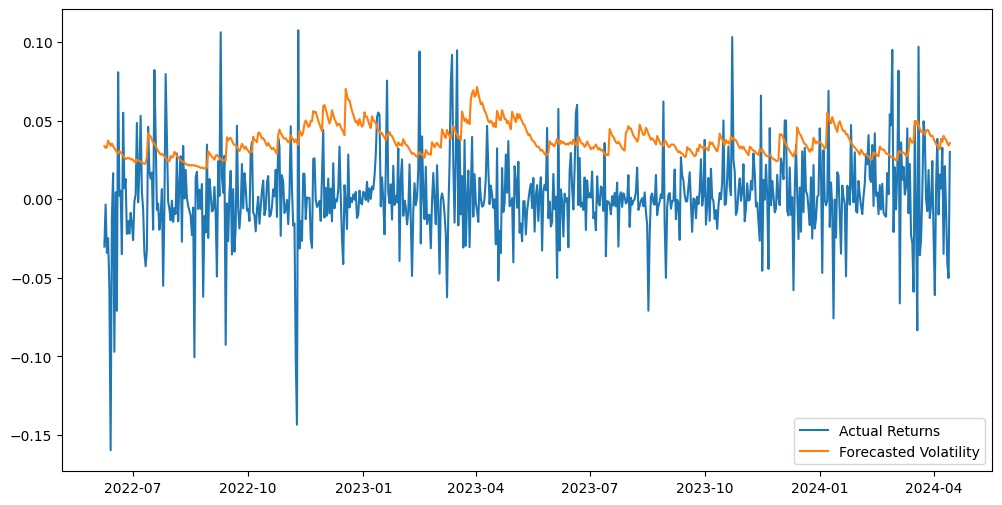

In [193]:
# Extract the daily returns
returns = data['Close'].pct_change().dropna()

# Train-test split
train_size = int(len(returns) * 0.80)
train_returns = returns.iloc[:train_size]
test_returns = returns.iloc[train_size:]

# Fit GARCH(1, 1) model
model = arch_model(train_returns, vol='Garch', p=1, q=1)
fit_model = model.fit()

# Forecast volatility on the test set
forecast_volatility = fit_model.conditional_volatility[-len(test_returns):]

# Calculate metrics
mse = mean_squared_error(test_returns, forecast_volatility)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_returns, forecast_volatility)
mape = np.mean(np.abs((test_returns - forecast_volatility) / test_returns)) * 100

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_returns.index, test_returns, label='Actual Returns')
plt.plot(test_returns.index, forecast_volatility, label='Forecasted Volatility')
plt.legend()
plt.show()
